In [2]:
import os
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv("retentiondata_case.csv")
print("Shape:", df.shape)
print("Columns:", list(df.columns))
df.head()

Shape: (5636, 36)
Columns: ['acct_ref', 'cust_ref', 'has_dependents', 'tenure_mo', 'home_phone', 'multi_line', 'internet_plan', 'add_on_security', 'add_on_backup', 'add_on_protection', 'tech_support_std', 'stream_tv', 'stream_movies', 'contract_term', 'e_bill_opt_in', 'pay_method', 'monthly_fee', 'total_billed', 'left_flag', 'fiscal_qtr', 'gender', 'age_years', 'is_married', 'dependents_count', 'referred_friend', 'referrals_count', 'recent_offer', 'avg_long_dist_fee', 'internet_tech', 'avg_gb_download', 'premium_support', 'stream_music', 'unlimited_data_opt', 'refunds_total', 'extra_data_fees_total', 'long_dist_fees_total']


,acct_ref,cust_ref,has_dependents,tenure_mo,home_phone,multi_line,internet_plan,add_on_security,add_on_backup,add_on_protection,...,recent_offer,avg_long_dist_fee,internet_tech,avg_gb_download,premium_support,stream_music,unlimited_data_opt,refunds_total,extra_data_fees_total,long_dist_fees_total
0,ACCT137932,CUST61880322,No,1,No,No phone service,DSL,No,Yes,No,...,Offer E,0.00,DSL,10,No,No,Yes,0.0,0,0.00
1,ACCT115088,CUST55192304,No,34,Yes,No,DSL,Yes,No,Yes,...,NaN,17.09,DSL,16,No,No,Yes,0.0,0,581.06
2,ACCT623423,CUST16890051,No,2,Yes,No,DSL,Yes,Yes,No,...,NaN,10.47,DSL,21,No,No,Yes,0.0,0,20.94
3,ACCT846960,CUST99388728,No,45,No,No phone service,DSL,Yes,No,Yes,...,NaN,0.00,DSL,10,Yes,No,Yes,0.0,0,0.00
4,ACCT146586,CUST91125265,No,2,Yes,No,Fiber optic,No,No,No,...,NaN,9.12,Fiber Optic,51,No,No,Yes,0.0,0,18.24


In [4]:
print("\nMissing values per column:")
print(df.isna().sum())

print("\nSummary statistics:")
print(df.describe(include="all"))


Missing values per column:
acct_ref                    0
cust_ref                    0
has_dependents              0
tenure_mo                   0
home_phone                  0
multi_line                  0
internet_plan               0
add_on_security             0
add_on_backup               0
add_on_protection           0
tech_support_std            0
stream_tv                   0
stream_movies               0
contract_term               0
e_bill_opt_in               0
pay_method                  0
monthly_fee                 0
total_billed                8
left_flag                   0
fiscal_qtr                  0
gender                      0
age_years                   0
is_married                  0
dependents_count            0
referred_friend             0
referrals_count             0
recent_offer             3106
avg_long_dist_fee           0
internet_tech            1212
avg_gb_download             0
premium_support             0
stream_music                0
unlimited_da

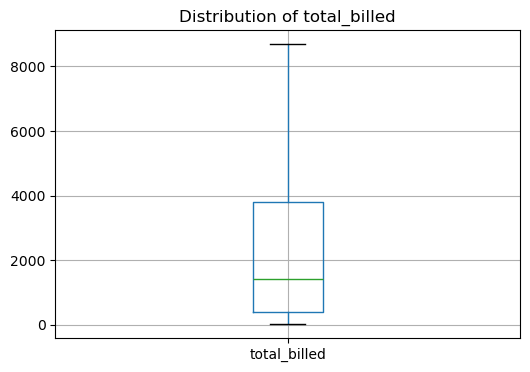

In [5]:
import matplotlib.pyplot as plt
df.boxplot(column='total_billed', figsize=(6, 4))
plt.title('Distribution of total_billed')
plt.show()

In [32]:
df = df.drop(columns = ['acct_ref', 'cust_ref'])
df = df.drop(columns = ['recent_offer'])
df['internet_tech'] = df['internet_tech'].fillna("No Internet")
df['total_billed'] = df['total_billed'].fillna(df['total_billed'].median())
df.drop(columns = ['fiscal_qtr'])
df['stream_count'] = (df[['stream_tv', 'stream_movies', 'stream_music']] == 'Yes').sum(axis=1)
df['add_on_count'] = (df[['add_on_security', 'add_on_backup', 'add_on_protection']] == 'Yes').sum(axis=1)

KeyError: "['acct_ref', 'cust_ref'] not found in axis"

In [11]:
df['tenure_group'] = pd.cut(
    df['tenure_mo'],
    bins=[0, 24, 48, float('inf')],
    labels=['Under 2 Years', '2-4 Years', 'Over 4 Years'],
    right=False
)

In [12]:
df.drop(columns = ['stream_tv', 'stream_movies', 'stream_music', 'add_on_security', 'add_on_backup', 'add_on_protection'])

,has_dependents,tenure_mo,home_phone,multi_line,internet_plan,tech_support_std,contract_term,e_bill_opt_in,pay_method,monthly_fee,...,avg_gb_download,premium_support,unlimited_data_opt,refunds_total,extra_data_fees_total,long_dist_fees_total,avg_monthly_spent,stream_count,add_on_count,tenure_group
0,No,1,No,No phone service,DSL,No,Month-to-month,Yes,Electronic check,29.85,...,10,No,Yes,0.00,0,0.00,29.850000,0,1,Under 2 Years
1,No,34,Yes,No,DSL,No,One year,No,Mailed check,56.95,...,16,No,Yes,0.00,0,581.06,55.573529,0,2,2-4 Years
2,No,2,Yes,No,DSL,No,Month-to-month,Yes,Mailed check,53.85,...,21,No,Yes,0.00,0,20.94,54.075000,0,2,Under 2 Years
3,No,45,No,No phone service,DSL,Yes,One year,No,Bank transfer (automatic),42.30,...,10,Yes,Yes,0.00,0,0.00,40.905556,0,2,2-4 Years
4,No,2,Yes,No,Fiber optic,No,Month-to-month,Yes,Electronic check,70.70,...,51,No,Yes,0.00,0,18.24,75.825000,0,0,Under 2 Years
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5631,No,19,Yes,No,Fiber optic,No,Month-to-month,Yes,Bank transfer (automatic),78.70,...,13,No,Yes,26.84,0,561.45,78.689474,1,0,Under 2 Years
5632,No,12,No,No phone service,DSL,Yes,One year,No,Electronic check,60.65,...,24,Yes,Yes,40.41,0,0.00,61.941667,3,2,Under 2 Years
5633,No,72,Yes,No,No,No internet service,Two year,Yes,Bank transfer (automatic),21.15,...,0,No,No,19.31,0,1639.44,19.713889,0,0,Over 4 Years
5634,No,4,Yes,Yes,Fiber optic,No,Month-to-month,Yes,Mailed check,74.40,...,8,No,No,0.00,20,42.44,76.650000,0,0,Under 2 Years


In [33]:
df['avg_monthly_spent'] = np.where(
    df['tenure_mo'] == 0,
    0,
    df['total_billed'] / df['tenure_mo']
)

In [13]:
print(df.isna().sum())

has_dependents           0
tenure_mo                0
home_phone               0
multi_line               0
internet_plan            0
add_on_security          0
add_on_backup            0
add_on_protection        0
tech_support_std         0
stream_tv                0
stream_movies            0
contract_term            0
e_bill_opt_in            0
pay_method               0
monthly_fee              0
total_billed             0
left_flag                0
fiscal_qtr               0
gender                   0
age_years                0
is_married               0
dependents_count         0
referred_friend          0
referrals_count          0
avg_long_dist_fee        0
internet_tech            0
avg_gb_download          0
premium_support          0
stream_music             0
unlimited_data_opt       0
refunds_total            0
extra_data_fees_total    0
long_dist_fees_total     0
avg_monthly_spent        0
stream_count             0
add_on_count             0
tenure_group             0
d

In [9]:
print(df["left_flag"].dtype)                     # what type is it? 
print(df["left_flag"].unique())  

object
['No' 'Yes']


In [34]:
Y = (df["left_flag"] == "Yes").astype("int64") # returns True for rows where response == 1 and False otherwise then .astype(int) converts True→1 and False→0, so the “positive” label becomes 1
X = df.drop(columns=["left_flag"]) 

In [35]:
from sklearn.model_selection import train_test_split

# Split into train/test sets
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, 
    test_size=0.3,     # 30% test, 70% train
    random_state=99,   # reproducibility
    shuffle=True       # shuffle before splitting
)

# Check shapes
X_train.shape, X_test.shape

((3945, 36), (1691, 36))

In [36]:
# Needed for preprocessing
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder


# Identify column types from TRAIN ONLY
num_cols = X_train.select_dtypes(include=["number"]).columns.tolist()
cat_cols = X_train.select_dtypes(exclude=["number"]).columns.tolist()

# Build preprocessing (train-only learning happens during .fit())
# numeric variable imputation
numeric_pipe = Pipeline([
    ("imputer", SimpleImputer(strategy="median"))
])

#categorical variable imputation
categorical_pipe = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="warn", sparse_output=False))  
])

#Aplpy the preprocessing to numeric and categorical variables
preprocess = ColumnTransformer([
    ("num", numeric_pipe, num_cols),
    ("cat", categorical_pipe, cat_cols)
])

In [37]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [38]:
from sklearn.model_selection import StratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier


# Stratified CV preserves class balance in each fold (important for classification)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=10)


# Pipeline with XGBoost model
xgb_pipe = Pipeline([
    ("preprocess", preprocess),
    ("model", XGBClassifier(
        objective="binary:logistic",
        n_jobs=2,          # use all cores
        eval_metric="auc",  # pairs well with scoring="roc_auc"
        tree_method="hist", # fast CPU histogram algorithm (use "gpu_hist" if you have a GPU)
        random_state=99
    ))
])

#  Hyperparameter grid (more parameters here: https://federated-xgboost.readthedocs.io/en/latest/python/python_api.html#module-xgboost.sklearn)
param_grid = {
    "model__n_estimators": [400, 800],
    "model__max_depth":    [4, 6, 8],
    "model__learning_rate":[0.05, 0.1],
    "model__subsample":    [0.8, 1.0],
    "model__colsample_bytree": [0.8, 1.0],
    "model__min_child_weight": [1, 3]
}

#  Cross-validated grid search (same scoring)
xgb_cv = GridSearchCV(
    estimator=xgb_pipe,
    param_grid=param_grid,
    cv=cv,
    scoring="roc_auc",
    n_jobs=-1,
    refit=True
)

# Fit 
xgb_cv.fit(X_train, Y_train)


print("Best params selected by CV:", xgb_cv.best_params_)
print("Best CV ROC-AUC:", round(xgb_cv.best_score_, 3))



Best params selected by CV: {'model__colsample_bytree': 0.8, 'model__learning_rate': 0.05, 'model__max_depth': 4, 'model__min_child_weight': 1, 'model__n_estimators': 400, 'model__subsample': 1.0}
Best CV ROC-AUC: 0.899


cat__internet_plan_Fiber optic       0.124513
cat__contract_term_Month-to-month    0.118233
cat__add_on_security_No              0.059503
cat__tech_support_std_No             0.052604
num__referrals_count                 0.044506
cat__contract_term_Two year          0.037516
cat__has_dependents_No               0.035021
num__dependents_count                0.029577
cat__is_married_Yes                  0.027331
cat__contract_term_One year          0.024147
dtype: float32

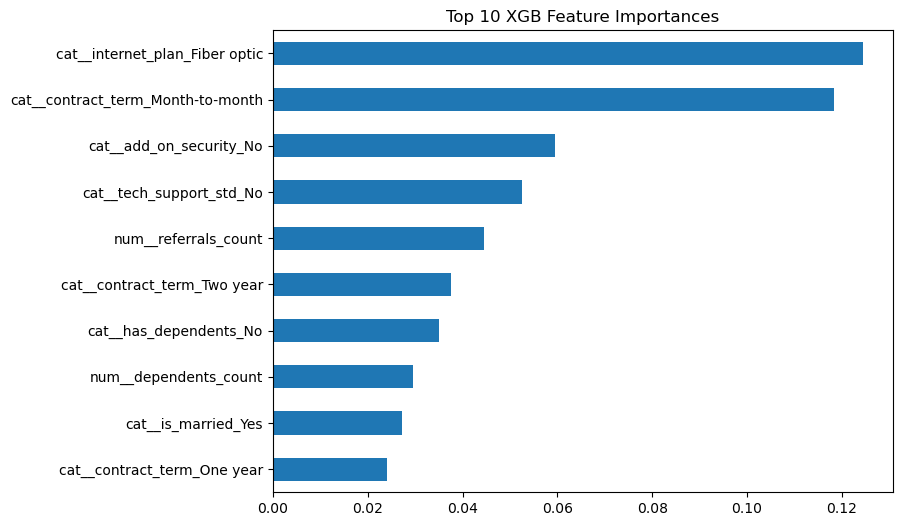

In [39]:
# Get best fitted model from GridSearchCV
best_xgb = xgb_cv.best_estimator_.named_steps["model"]

#get important features
pre = xgb_cv.best_estimator_.named_steps["preprocess"]
feature_names = pre.get_feature_names_out()
imp = pd.Series(best_xgb.feature_importances_, index=feature_names).sort_values(ascending=False)

display(imp.head(10))  # top 10 features


# Optional: plot top features
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
imp.head(10).plot(kind="barh", x="feature", y="importance", legend=False)
plt.title("Top 10 XGB Feature Importances")
plt.gca().invert_yaxis()
plt.show()

In [43]:
pip install shap


   ---------------------------------------- 0.0/549.1 kB ? eta -:--:--
   ---------------------------------------- 549.1/549.1 kB 9.5 MB/s eta 0:00:00

   -------------------- ------------------- 1/2 [shap]
   -------------------- ------------------- 1/2 [shap]
   -------------------- ------------------- 1/2 [shap]
   ---------------------------------------- 2/2 [shap]



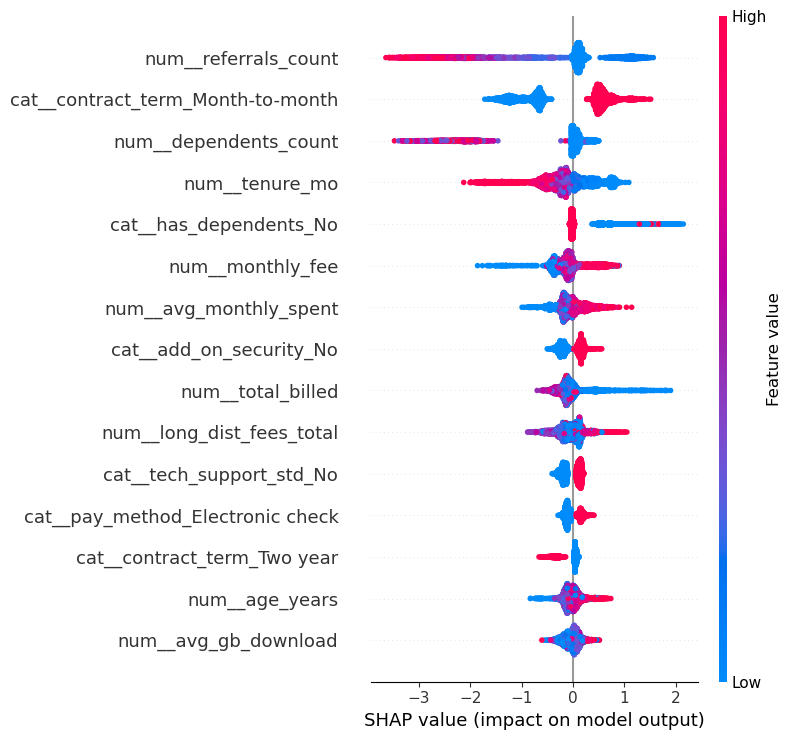

In [44]:
import shap

pre = xgb_cv.best_estimator_.named_steps["preprocess"]

#  Transform X the same way the model saw it
X_train_enc = pre.transform(X_train)

#  Get feature names after preprocessing (works for ColumnTransformer / Pipeline in sklearn >= 1.0)
feature_names = None
if hasattr(pre, "get_feature_names_out"):
    feature_names = pre.get_feature_names_out()
    
# Create SHAP explainer for tree-based models (e.g., XGBoost, LightGBM, RandomForest)
explainer   = shap.TreeExplainer(best_xgb)

# Compute SHAP values for the training set
# Each value shows how much a feature pushes a prediction toward class 1 (positive) or class 0 (negative)
shap_values = explainer.shap_values(X_train_enc)

# Overall PLot Beeswarm plot: this shows both which features matter most and the direction of their influence

shap.summary_plot(shap_values, X_train_enc, max_display=15, show=True,feature_names=feature_names)

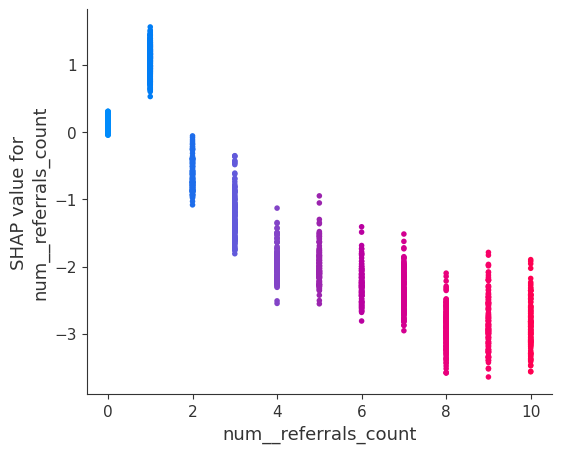

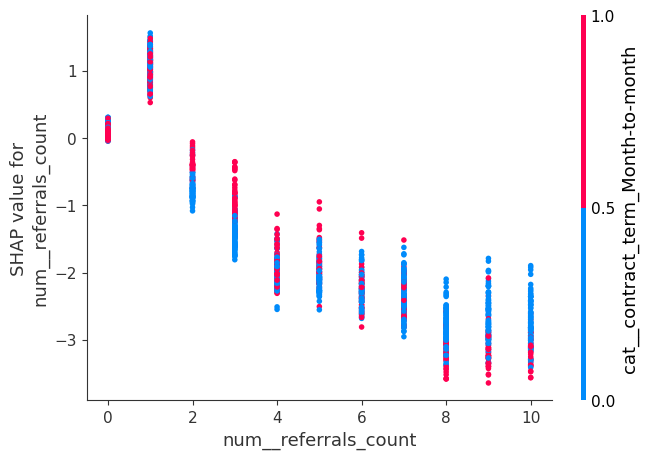

In [50]:
#Dependence plot for one feature
shap.dependence_plot("num__referrals_count", shap_values, X_train_enc, interaction_index="num__referrals_count", show=True,feature_names=feature_names)

# Dependence plot for one feature, colored by another feature
shap.dependence_plot("num__referrals_count", shap_values, X_train_enc, interaction_index="cat__contract_term_Month-to-month", show=True,feature_names=feature_names)

## Predictions for Test Set

In [51]:
Ytest_prob = xgb_cv.predict_proba(X_test)[:, 1]

## Evaluate Test set

Test ROC-AUC: 0.8991


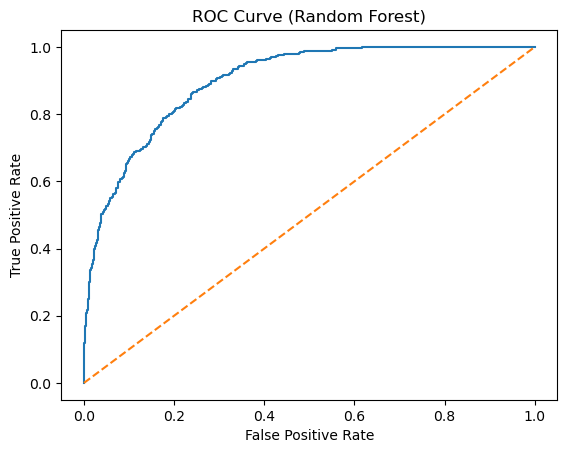

In [52]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt  

test_auc = roc_auc_score(Y_test, Ytest_prob)
print("Test ROC-AUC:", round(test_auc, 4))

# ROC curve (single plot; no custom colors)
fpr, tpr, _ = roc_curve(Y_test, Ytest_prob)
plt.plot(fpr, tpr)
plt.plot([0,1],[0,1],'--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve (Random Forest)")
plt.show()